In [1]:
# imports and setup
%matplotlib inline

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

pd.set_option('precision', 2) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation
plt.style.use('seaborn') # pretty matplotlib plots

In [3]:
# load data
smarket = pd.read_csv('Smarket.csv', index_col=0)
smarket.Direction = smarket.Direction.astype('category')
smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.38,-0.19,-2.62,-1.05,5.01,1.19,0.96,Up
2,2001,0.96,0.38,-0.19,-2.62,-1.05,1.30,1.03,Up
3,2001,1.03,0.96,0.38,-0.19,-2.62,1.41,-0.62,Down
4,2001,-0.62,1.03,0.96,0.38,-0.19,1.28,0.61,Up
5,2001,0.61,-0.62,1.03,0.96,0.38,1.21,0.21,Up
...,...,...,...,...,...,...,...,...,...
1246,2005,0.42,0.25,-0.02,-0.58,-0.28,1.89,0.04,Up
1247,2005,0.04,0.42,0.25,-0.02,-0.58,1.29,-0.95,Down
1248,2005,-0.95,0.04,0.42,0.25,-0.02,1.54,0.13,Up
1249,2005,0.13,-0.95,0.04,0.42,0.25,1.42,-0.30,Down


In [4]:
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,"1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00"
mean,"2,003.02",0.00,0.00,0.00,0.00,0.01,1.48,0.00
std,1.41,1.14,1.14,1.14,1.14,1.15,0.36,1.14
min,"2,001.00",-4.92,-4.92,-4.92,-4.92,-4.92,0.36,-4.92
25%,"2,002.00",-0.64,-0.64,-0.64,-0.64,-0.64,1.26,-0.64
50%,"2,003.00",0.04,0.04,0.04,0.04,0.04,1.42,0.04
75%,"2,004.00",0.60,0.60,0.60,0.60,0.60,1.64,0.60
max,"2,005.00",5.73,5.73,5.73,5.73,5.73,3.15,5.73


In [6]:
smarket.dtypes

Year            int64
Lag1          float64
Lag2          float64
Lag3          float64
Lag4          float64
Lag5          float64
Volume        float64
Today         float64
Direction    category
dtype: object

In [9]:
smarket.info(memory_usage='deep')
#smarket.info?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null category
dtypes: category(1), float64(7), int64(1)
memory usage: 89.3 KB


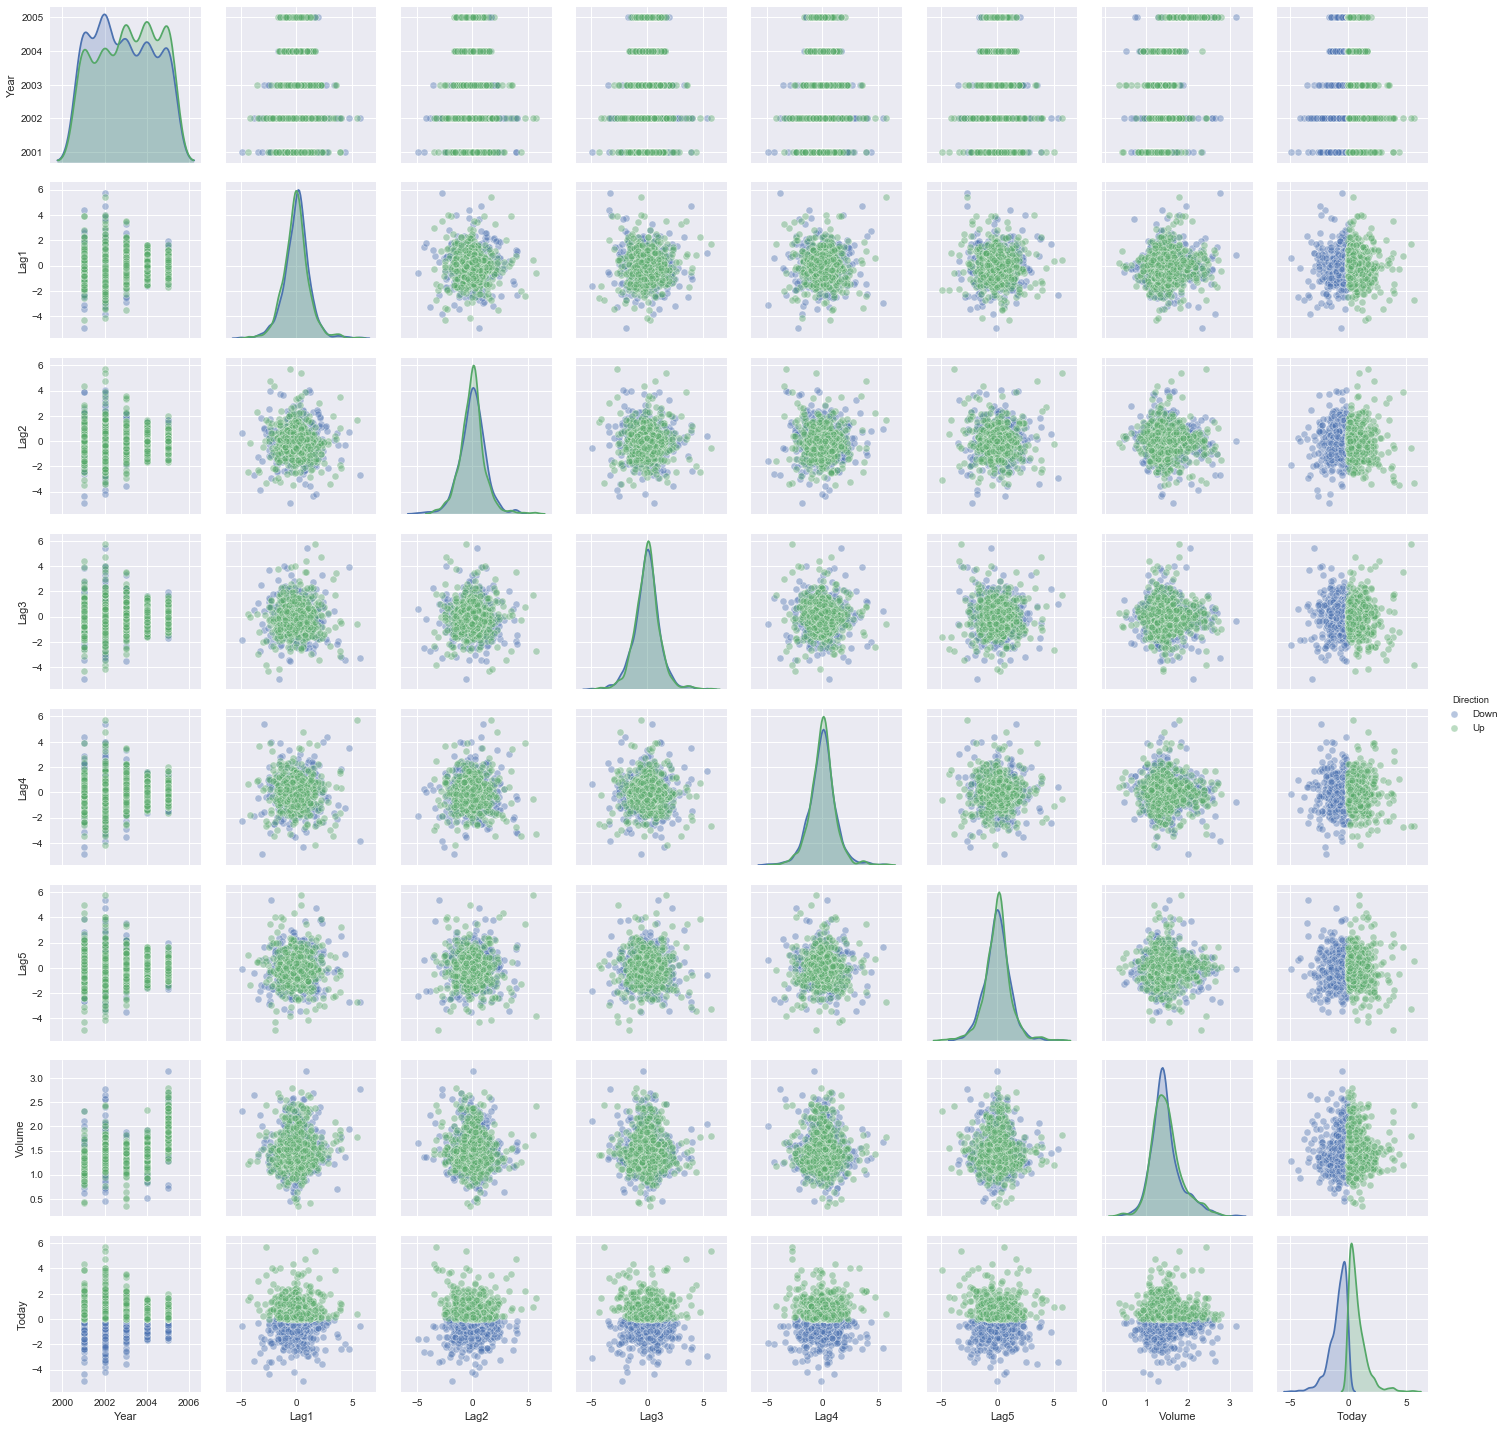

In [17]:
sns.pairplot(smarket, hue='Direction', plot_kws={'alpha':0.4});

In [12]:
#sns.pairplot?

In [18]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00,0.03,0.03,0.03,0.04,0.03,0.54,0.03
Lag1,0.03,1.00,-0.03,-0.01,-0.00,-0.01,0.04,-0.03
Lag2,0.03,-0.03,1.00,-0.03,-0.01,-0.00,-0.04,-0.01
Lag3,0.03,-0.01,-0.03,1.00,-0.02,-0.02,-0.04,-0.00
Lag4,0.04,-0.00,-0.01,-0.02,1.00,-0.03,-0.05,-0.01
Lag5,0.03,-0.01,-0.00,-0.02,-0.03,1.00,-0.02,-0.03
Volume,0.54,0.04,-0.04,-0.04,-0.05,-0.02,1.00,0.01
Today,0.03,-0.03,-0.01,-0.00,-0.01,-0.03,0.01,1.00


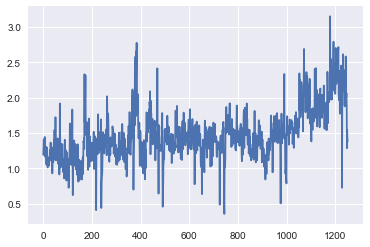

In [24]:
plt.plot(smarket.Volume)